# Assignment 1
_Social graphs and interactions (02805)_

## Part 1: Binning degree distributions

### A. Binning real numbers

1. Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [1]:
import numpy as np

random_generator = np.random.default_rng(42)

mean = 2
standard_deviation = 0.125
number_of_data_points = 5000

random_data_points = random_generator.normal(mean, standard_deviation, number_of_data_points)

2. Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

> `numpy.histogram` returns a tuple of arrays. The first one contains the count of values per bin, the second array contains the boundaries of the bins. They do not have the same length as the second array contains one more boundary than there are bins.

In [2]:
number_of_bins = 10
histogram = np.histogram(random_data_points, number_of_bins)

print(f"Length of 1st histogram array: {len(histogram[0])}")
print(f"Length of 2st histogram array: {len(histogram[1])}")

Length of 1st histogram array: 10
Length of 2st histogram array: 11


3. Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

> As the bin-array contains 2 boundaries (left and right) for each bin it has one more boundary than the count-array (the right boundary of the preceding count-value being the left boundary of the next count-value). In order to use the `plot()` method the bin-value on the very right is discarded by using `[:-1]`. However, another solution would be to create a new array with values being the mean of their preceding and succeeding value of the existing boundaries.

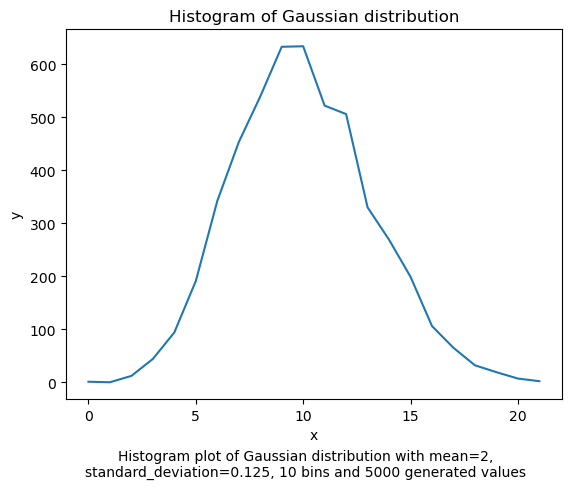

In [12]:
import matplotlib.pyplot as plt

x_values = histogram[1][:-1]
y_values = histogram[0]

plt.plot(x_values, y_values)
plt.title(f'Histogram of Gaussian distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.figtext(.5,-0.05, f"Histogram plot of Gaussian distribution with mean={mean},\nstandard_deviation={standard_deviation}, {number_of_bins} bins and {number_of_data_points} generated values", ha='center')
plt.show()

### B. Binning integers

1. But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.

In [15]:
poisson_lambda = 10
number_of_data_points = 5000

random_poisson_data_points = np.random.poisson(poisson_lambda, number_of_data_points)
random_poisson_max_value = max(random_poisson_data_points)
random_poisson_min_value = min(random_poisson_data_points)

print(f'Maximum value of poisson distributed values: {random_poisson_max_value}')
print(f'Minimum value of poisson distributed values: {random_poisson_min_value}')

Maximum value of poisson distributed values: 24
Minimum value of poisson distributed values: 1


2. Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

> The min-value of the Poisson distribution acts as the left boundary of the first bin (including the `min-value` counts but excluding `min-value` $+ 1$ counts), the `max-value` of the Poisson distribution acts as the righthand-most bin boundary. It includes the `max_value` counts *and* `max_value` $-1$ counts.

In [16]:
# +2 because the value of the stop parameter of range() is exclusive
v = np.array(range(random_poisson_min_value, random_poisson_max_value + 2))

histogram = np.histogram(random_poisson_data_points, bins=v)

sum_over_bin_counts = sum(histogram[0])
print(f'Sum over bin counts: {sum_over_bin_counts}')

Sum over bin counts: 5000


3. Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution

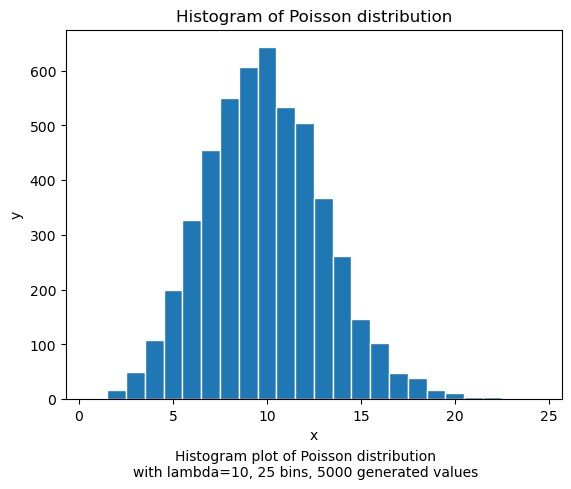

In [6]:
x_values = histogram[1][:-1]
y_values = histogram[0]

plt.bar(x=x_values, height=y_values, edgecolor="white", width=(histogram[1][1] - histogram[1][0]))
plt.title(f'Histogram of Poisson distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.figtext(.5,-0.05, f"Histogram plot of Poisson distribution\nwith lambda={poisson_lambda}, {len(v)} bins, {number_of_data_points} generated values", ha='center')
plt.show()

### C. Binning and plotting degree distributions

1. Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? **Hint**: The parameter $ \lambda $ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.

> The following calculation finds $p$:

$$\lambda = \langle k \rangle = p(N-1)$$
$$\text{ with } \lambda = 10; N = 5000 \Rightarrow 10 = p(5000 - 1)$$
$$p = 10 / 4999 \approx 0.002$$

In [7]:
N = 5000
p = 10 / 4999

2. Now, use `networkx` to create the graph and extract the degree distribution.

In [8]:
import networkx as nx

er_network = nx.erdos_renyi_graph(N, p)

3. Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

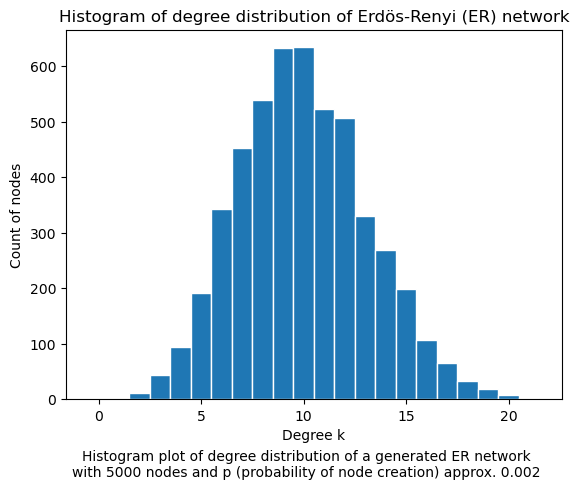

In [9]:
degrees = [degree for (node, degree) in list(er_network.degree())]

er_min_degree = min(degrees)
er_max_degree = max(degrees)

# +2 because the stop parameter of range() is excluded
v = np.array(range(er_min_degree, er_max_degree + 2))

histogram = np.histogram(degrees, bins=v)

x_values = histogram[1][:-1]
y_values = histogram[0]

plt.bar(x=x_values, height=y_values, edgecolor="white", width=(histogram[1][1] - histogram[1][0]))
plt.title(f'Histogram of degree distribution of Erdös-Renyi (ER) network')
plt.xlabel("Degree k")
plt.ylabel("Count of nodes")
plt.figtext(.5,-0.05, f"Histogram plot of degree distribution of a generated ER network\nwith {N} nodes and p (probability of node creation) approx. {p:.3f}", ha='center')
plt.show()